<a href="https://colab.research.google.com/github/PauloSilva16/Modula-o-Digital/blob/main/Simula%C3%A7%C3%A3o_BPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modulação BPSK <p> Chaveamento de fase binária <p>
Comportamento com adição de 4 níveis de rúido awgn



$$ s(t) = A \cos(2\pi f_c t + \Theta(t)) $$


bits gerados =  [0 1 0 1 1]


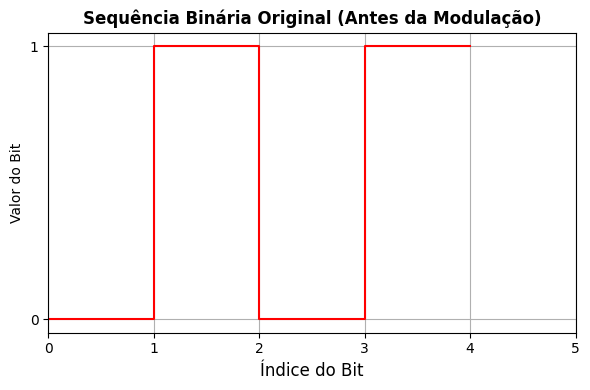

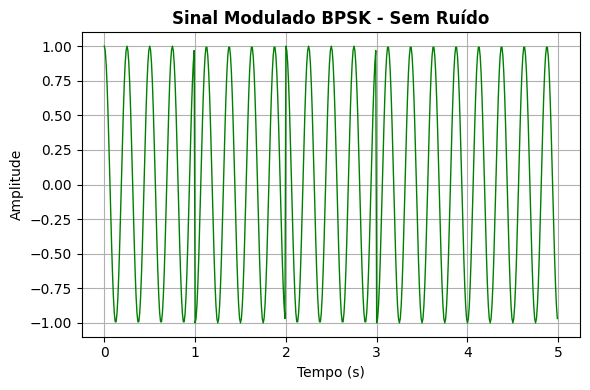

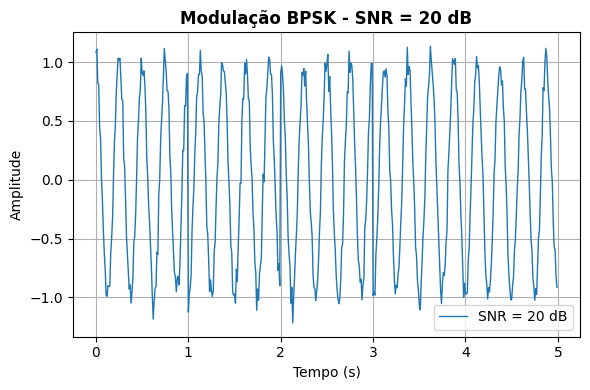

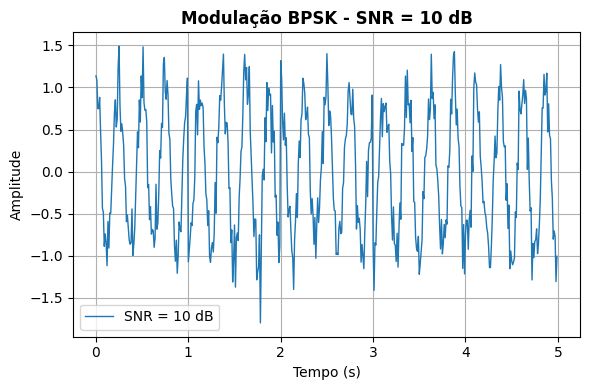

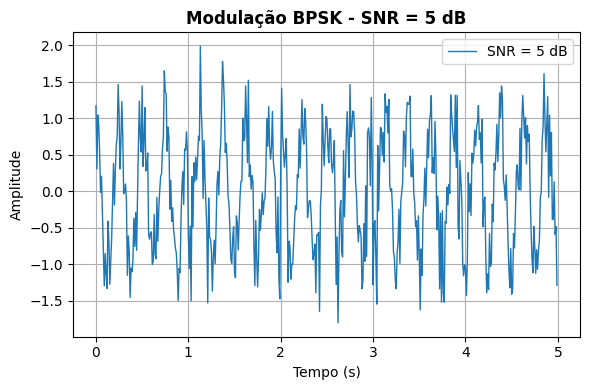

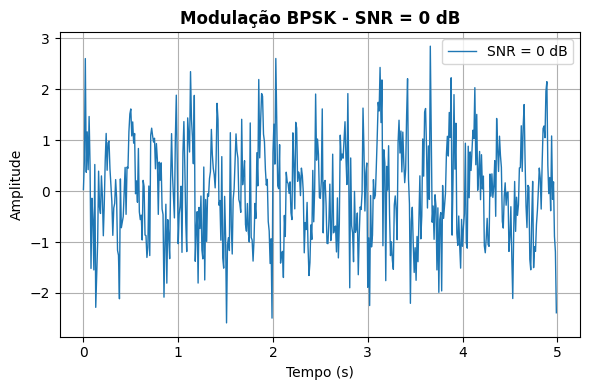

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para adicionar ruído AWGN ao sinal
def awgn_noise(signal, snr_db):
    snr = 10 ** (snr_db / 10)  # Converter SNR de dB para uma escala linear
    power = np.mean(np.abs(signal) ** 2)  # Potência do sinal
    noise_power = power / snr  # Potência do ruído
    noise = np.sqrt(noise_power) * np.random.randn(len(signal))  # Gerar o ruído
    return signal + noise

# Parâmetros da modulação
fs = 100  # Frequência de amostragem (Hz)
f_carrier = 4  # Frequência da portadora (Hz)
n_bits = 5  # Número de bits a serem gerados
message_bits = np.random.randint(0, 2, n_bits)  # Sequência de bits aleatórios
t_bit = 1  # Duração de cada bit (segundos)
t = np.arange(0, t_bit, 1 / fs)  # Vetor de tempo para uma duração de bit

# Gerar sinal BPSK
bpsk_signal = np.array([np.cos(2 * np.pi * f_carrier * t + (0 if bit == 0 else np.pi)) for bit in message_bits])
bpsk_signal = bpsk_signal.flatten()  # Achatar a lista para um vetor único
print("bits gerados = ", message_bits, )

# Vetor de tempo completo para o sinal modulado
t_total = np.arange(0, len(bpsk_signal) / fs, 1 / fs)

#Gráfico 1: Sequência Binária Original (antes da modulação)**
plt.figure(figsize=(6, 4))
plt.step(np.arange(n_bits), message_bits, where='post', color='r', label='Sinal Original (Sem Modulação)')
plt.title('Sequência Binária Original (Antes da Modulação)', fontsize=12, weight='bold')
plt.xlabel('Índice do Bit', fontsize=12)
plt.ylabel('Valor do Bit', fontsize=10)
plt.yticks([0, 1])
plt.xlim(0, n_bits)  # Ajuste o limite do eixo X para visualização completa
plt.grid(True)
plt.tight_layout()
plt.show()

# --**Gráfico do Sinal Original (sem ruído)**
plt.figure(figsize=(6, 4))
plt.plot(t_total[:800], bpsk_signal[:800], label='Sinal Original (Sem Ruído)', color='g', lw=1)
plt.title('Sinal Modulado BPSK - Sem Ruído', fontsize=12, weight='bold')
plt.xlabel('Tempo (s)', fontsize=10)
plt.ylabel('Amplitude', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Gráficos para cada nível de SNR (com o sinal original como referência)**
snr_db_values = [20, 10, 5, 0]
for snr_db in snr_db_values:
    plt.figure(figsize=(6, 4))
    bpsk_signal_noisy = awgn_noise(bpsk_signal, snr_db)  # Adicionar ruído ao sinal BPSK
    plt.plot(t_total[:800], bpsk_signal_noisy[:800], label=f'SNR = {snr_db} dB', lw=1)
    plt.title(f'Modulação BPSK - SNR = {snr_db} dB', fontsize=12, weight='bold')
    plt.xlabel('Tempo (s)', fontsize=10)
    plt.ylabel('Amplitude', fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Análise de desempenho

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Função para adicionar ruído AWGN ao sinal
def awgn_noise(signal, snr_db):
    snr = 10 ** (snr_db / 10)  # Converter SNR de dB para uma escala linear
    noise_power = np.mean(np.abs(signal) ** 2) / snr  # Potência do ruído
    noise = np.sqrt(noise_power) * np.random.randn(len(signal))  # Gerar o ruído
    return signal + noise

# Função para calcular a taxa de erro de bit (BER)
def calculate_ber(original_bits, received_bits):
    return np.mean(original_bits != received_bits)

# Parâmetros da modulação
fs = 50  # Frequência de amostragem (Hz)
f_carrier = 4  # Frequência da portadora (Hz)
t_bit = 1  # Duração de cada bit (segundos)
n_bits = 10000  # Número de bits

# Vetor de tempo para uma duração de bit
t = np.arange(0, t_bit, 1 / fs)

# Níveis de SNR para simulação
snr_db_values = [0, 5, 10, 20]  # SNR em dB

# Armazenar os resultados de BER para as simulações
ber_means = []
ber_stds = []
no_of_errors = []

# Realizar a simulação para diferentes valores de SNR
for snr_db in snr_db_values:
    ber_simulations = []
    errors_simulations = []

    for _ in range(50):  # Simulação de 50 experimentos
        # Gerar sequência de bits aleatórios
        message_bits = np.random.randint(0, 2, n_bits)

        # Gerar o sinal BPSK (com +1 e -1 em vez de 0 e 1)
        bpsk_signal = 2 * message_bits - 1  # Transformando 0 em -1 e 1 em +1

        # Adicionar ruído AWGN ao sinal
        bpsk_signal_noisy = awgn_noise(bpsk_signal, snr_db)

        # Estimativa do sinal recebido
        decoded_bits = (bpsk_signal_noisy >= 0).astype(int)  # Decodificar como 1 se maior que 0, senão -1

        # Calcular e armazenar a BER
        ber = calculate_ber(message_bits, decoded_bits)
        ber_simulations.append(ber)

        # Calcular o número de erros
        errors_simulations.append(np.sum(message_bits != decoded_bits))

    # Calcular a média e desvio padrão do BER para o SNR atual
    ber_mean = np.mean(ber_simulations)
    ber_std = np.std(ber_simulations)

    # Calcular o número total de erros para o SNR atual
    total_errors = np.sum(errors_simulations)

    # Armazenar os resultados
    ber_means.append(ber_mean)
    ber_stds.append(ber_std)
    no_of_errors.append(total_errors)

    # Exibir os resultados
    print(f"SNR = {snr_db} dB: Média BER = {ber_mean:.4f}, Desvio Padrão = {ber_std:.4f}, No of Errors = {total_errors}")

# Cálculo da BER teórica (para comparação)
def theoretical_ber(snr_db):
    snr = 10 ** (snr_db / 10)  # SNR em escala linear
    return 0.5 * np.exp(-snr)  # BER teórica para BPSK em AWGN

# Criar DataFrame para mostrar os resultados
results_df = pd.DataFrame({
    'SNR (dB)': snr_db_values,
    'No of Errors': no_of_errors,
    'Error Probability': ber_means
})

# Exibir os resultados da tabela
print("\nTabela de Resultados (SNR, No of Errors, Error Probability):")
print(results_df)

SNR = 0 dB: Média BER = 0.1587, Desvio Padrão = 0.0036, No of Errors = 79327
SNR = 5 dB: Média BER = 0.0376, Desvio Padrão = 0.0016, No of Errors = 18816
SNR = 10 dB: Média BER = 0.0008, Desvio Padrão = 0.0002, No of Errors = 381
SNR = 20 dB: Média BER = 0.0000, Desvio Padrão = 0.0000, No of Errors = 0

Tabela de Resultados (SNR, No of Errors, Error Probability):
   SNR (dB)  No of Errors  Error Probability
0         0         79327           0.158654
1         5         18816           0.037632
2        10           381           0.000762
3        20             0           0.000000


/tmp/ipython-input-2074350044.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([1e-5, -1]) # Define o limite do eixo Y para melhor visualização


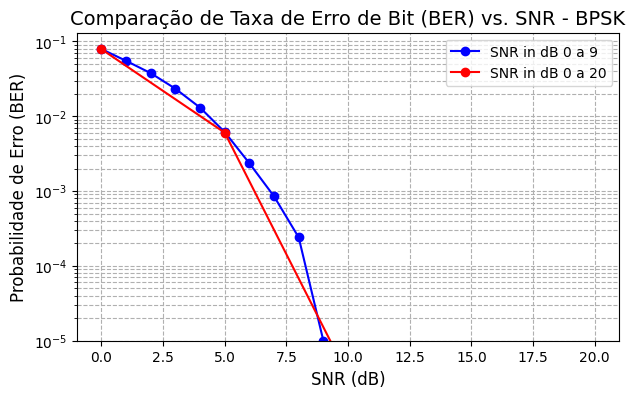

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Dados do Dataset 1 ---
snr1_db = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ber1 = np.array([0.079, 0.05496, 0.03763, 0.02332, 0.01303, 0.00614, 0.00235, 0.00085, 0.00024, 1e-05])

# --- Dados do Dataset 2 ---
snr2_db = np.array([0, 5, 10, 20])
# O valor 0.0 para BER em SNR=20dB não aparecerá na escala log, o que é esperado.
ber2 = np.array([7.8683e-02, 6.0276e-03, 3.4000e-06, 0.0])

# --- Criação do Gráfico ---
plt.figure(figsize=(7, 4))

# Plotar os dados do Dataset 1 com marcadores circulares e linha contínua
plt.semilogy(snr1_db, ber1, 'o-', label='SNR in dB 0 a 9', color='blue')

# Plotar os dados do Dataset 2 com marcadores quadrados e linha tracejada
plt.semilogy(snr2_db, ber2, 'o-', label='SNR in dB 0 a 20', color='red')

# --- Configurações e Títulos ---
plt.title('Comparação de Taxa de Erro de Bit (BER) vs. SNR - BPSK', fontsize=14)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Probabilidade de Erro (BER)', fontsize=12)
plt.legend() # Adiciona a legenda para identificar as linhas
plt.grid(True, which="both", linestyle='--') # Adiciona a grade para facilitar a leitura
plt.ylim([1e-5, -1]) # Define o limite do eixo Y para melhor visualização

# Exibir o gráfico
plt.show()

bits gerados =  [0 1 0 1 0]


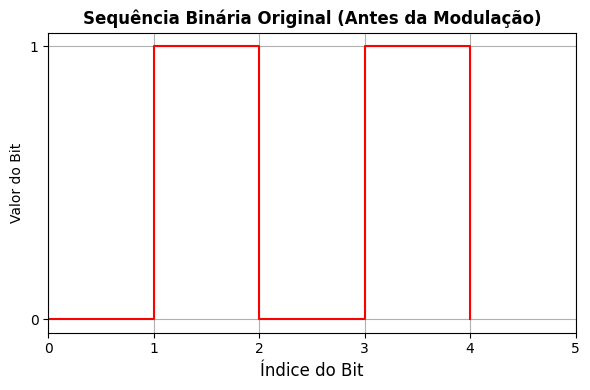

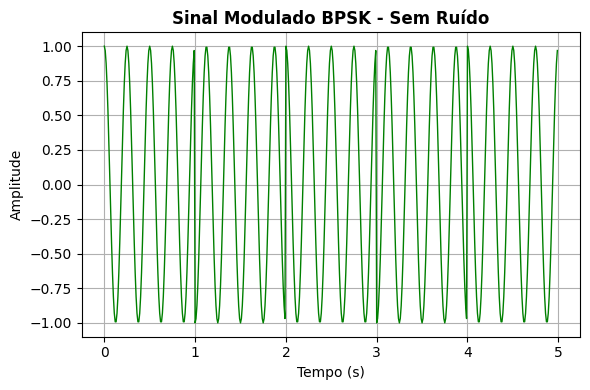

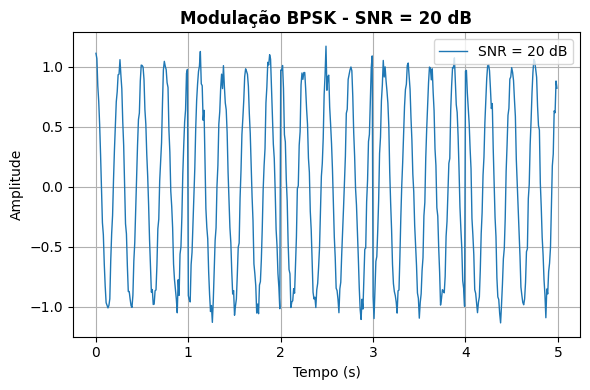

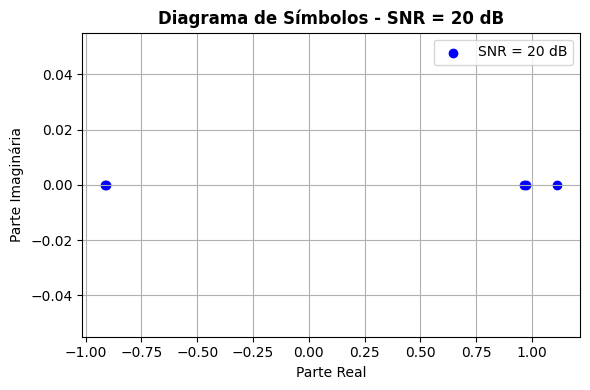

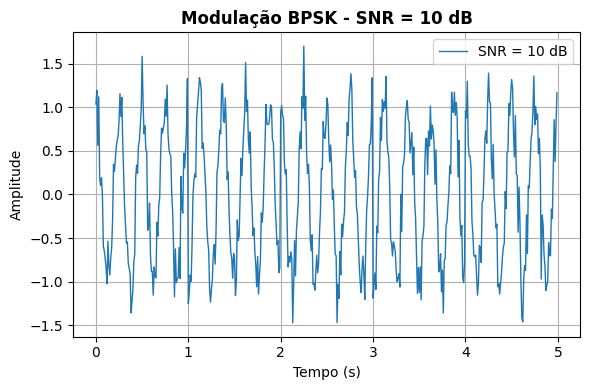

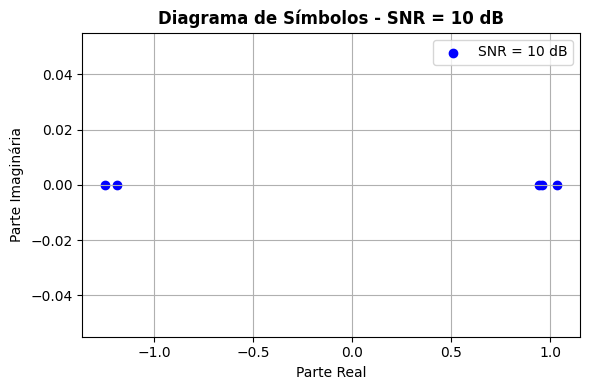

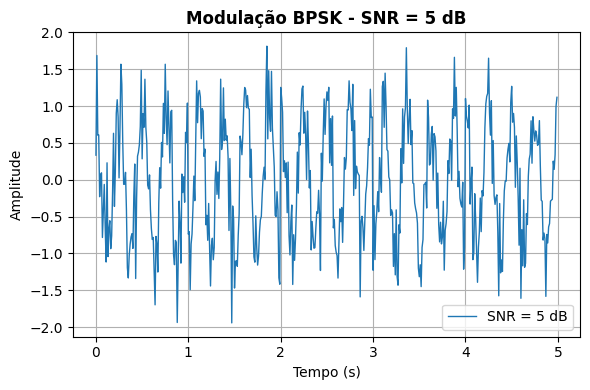

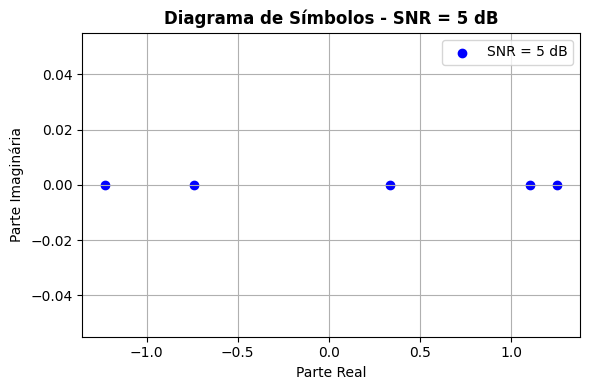

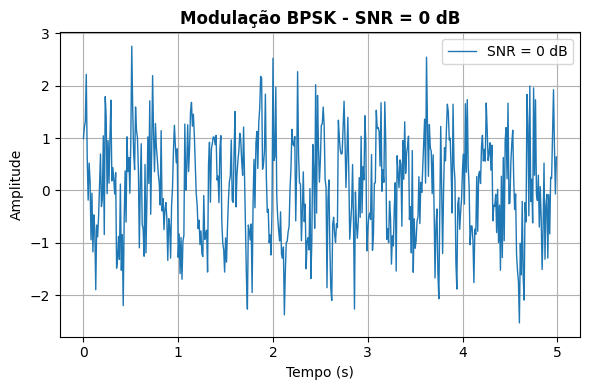

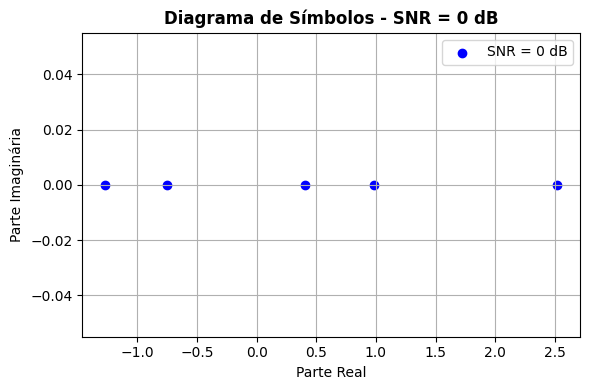

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Função para adicionar ruído AWGN ao sinal
def awgn_noise(signal, snr_db):
    snr = 10 ** (snr_db / 10)  # Converter SNR de dB para uma escala linear
    power = np.mean(np.abs(signal) ** 2)  # Potência do sinal
    noise_power = power / snr  # Potência do ruído
    noise = np.sqrt(noise_power) * np.random.randn(len(signal))  # Gerar o ruído
    return signal + noise

# Parâmetros da modulação
fs = 100  # Frequência de amostragem (Hz)
f_carrier = 4  # Frequência da portadora (Hz)
n_bits = 5  # Número de bits a serem gerados
message_bits = np.random.randint(0, 2, n_bits)  # Sequência de bits aleatórios
t_bit = 1  # Duração de cada bit (segundos)
t = np.arange(0, t_bit, 1 / fs)  # Vetor de tempo para uma duração de bit

# Gerar sinal BPSK
bpsk_signal = np.array([np.cos(2 * np.pi * f_carrier * t + (0 if bit == 0 else np.pi)) for bit in message_bits])
bpsk_signal = bpsk_signal.flatten()  # Achatar a lista para um vetor único
print("bits gerados = ", message_bits)

# Vetor de tempo completo para o sinal modulado
t_total = np.arange(0, len(bpsk_signal) / fs, 1 / fs)

# Gráfico 1: Sequência Binária Original (antes da modulação)
plt.figure(figsize=(6, 4))
plt.step(np.arange(n_bits), message_bits, where='post', color='r', label='Sinal Original (Sem Modulação)')
plt.title('Sequência Binária Original (Antes da Modulação)', fontsize=12, weight='bold')
plt.xlabel('Índice do Bit', fontsize=12)
plt.ylabel('Valor do Bit', fontsize=10)
plt.yticks([0, 1])
plt.xlim(0, n_bits)  # Ajuste o limite do eixo X para visualização completa
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico do Sinal Original (sem ruído)
plt.figure(figsize=(6, 4))
plt.plot(t_total[:800], bpsk_signal[:800], label='Sinal Original (Sem Ruído)', color='g', lw=1)
plt.title('Sinal Modulado BPSK - Sem Ruído', fontsize=12, weight='bold')
plt.xlabel('Tempo (s)', fontsize=10)
plt.ylabel('Amplitude', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Gráficos para cada nível de SNR (com o sinal original como referência)**
snr_db_values = [20, 10, 5, 0]
for snr_db in snr_db_values:
    # Adicionando ruído ao sinal BPSK
    bpsk_signal_noisy = awgn_noise(bpsk_signal, snr_db)

    # Plotando o gráfico do sinal modulado com ruído
    plt.figure(figsize=(6, 4))
    plt.plot(t_total[:800], bpsk_signal_noisy[:800], label=f'SNR = {snr_db} dB', lw=1)
    plt.title(f'Modulação BPSK - SNR = {snr_db} dB', fontsize=12, weight='bold')
    plt.xlabel('Tempo (s)', fontsize=10)
    plt.ylabel('Amplitude', fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráfico do Diagrama de Símbolos (para o sinal com ruído)
    plt.figure(figsize=(6, 4))
    plt.scatter(np.real(bpsk_signal_noisy[::len(t)]), np.imag(bpsk_signal_noisy[::len(t)]), label=f'SNR = {snr_db} dB', color='b')
    plt.title(f'Diagrama de Símbolos - SNR = {snr_db} dB', fontsize=12, weight='bold')
    plt.xlabel('Parte Real', fontsize=10)
    plt.ylabel('Parte Imaginária', fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
